In [1]:
from fastai.vision.all import *
from os import path

In [2]:
path = '../../data/single_label/'

train_df = pd.read_csv(path + 'train.csv')
train_df.head()

,id,genres
0,71139,Comedy
1,73330,Comedy
2,53693,Documentary
3,121140,Horror
4,45090,Adventure


In [3]:
def get_x(r):
    return path + 'train_data/' + r['id'].astype(str) + '.jpg'

def get_y(r):
    return r['genres']

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x = get_x, 
                   get_y = get_y,
                   item_tfms = RandomResizedCrop(128, min_scale = 0.35),
                   batch_tfms=aug_transforms())

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


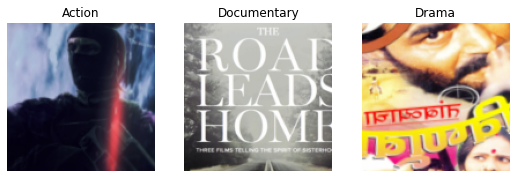

In [4]:
dls = dblock.dataloaders(train_df)
dls.show_batch(nrows=1, ncols=3)

In [ ]:
model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, 7e-4)

In [ ]:
learn.show_results()

In [ ]:
learn.export('single_genre_predictor_fastai.pkl')

Reference:
https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb